<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Multiple_linear_regression_tutorial_advertising_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Multiple Linear Regression`

#### `Context : Multiple Linear Regression`

Linear Regression is a useful tool for predicting a quantitative response. Unlike the simple linear regression which is only use single predictor, multiple linear regression uses several features to predict a continous value.

We have the linear regression model has the form:

$f(x) = \beta_0 + \sum\limits_{j=1}^p X_j\beta_j$

**where**
- $f(x)$: response/dependent variable
- $X_j$: explanatory/independent variable
- $\beta_j$: slope coefficient
- $\beta_0$: intercept terms

**Initial Setup**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

**Load the Data**

The advertising dataset captures sales revenue generated with respect to advertisement spends across multiple channel like radio, TV, and newspaper.

In [3]:
# Loading dataset
advertising = r"https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/advertising.csv"
data = pd.read_csv(advertising)
data = data.drop(columns='Unnamed: 0')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### **Data Analysis (EDA)**

Let's explore these types of relationships across the entire data set. Based off this plot what looks to be the most correlated feature sales?

In [4]:
data.shape

(200, 4)

In [5]:
# data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


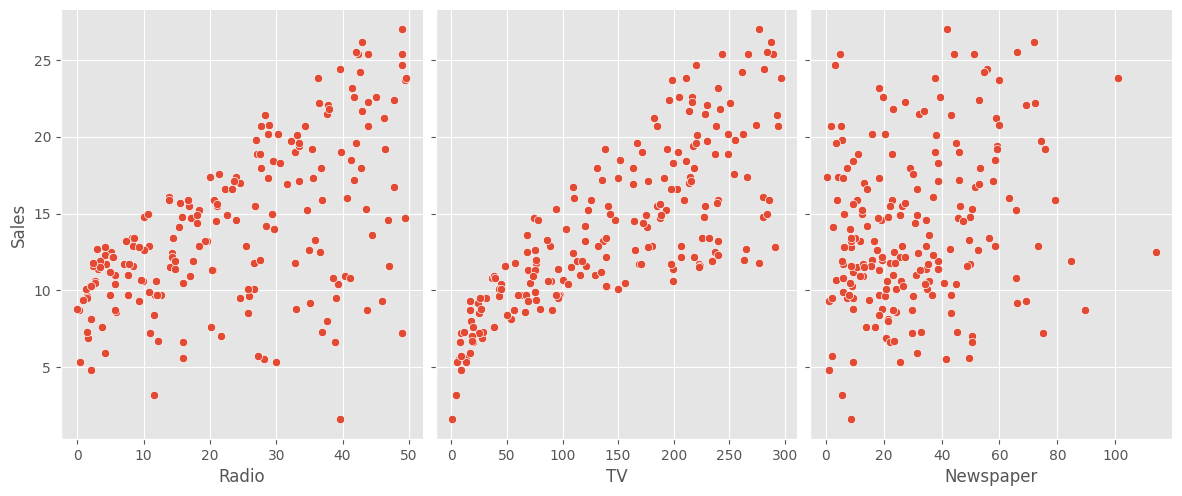

In [7]:
sns.pairplot(data=data, x_vars=['Radio','TV','Newspaper'],y_vars='Sales',height=5,aspect=0.8)
plt.show()

#### **Estimating Coefficients**

Create a linear model plot of sales from tv, radio, and newspaper variable.

In [8]:
# linear regression model plot # add constant
sm.add_constant(data.drop(columns='Sales'))

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4
...,...,...,...,...
195,1.0,38.2,3.7,13.8
196,1.0,94.2,4.9,8.1
197,1.0,177.0,9.3,6.4
198,1.0,283.6,42.0,66.2


In [9]:
# Building linear regression model
sm_lm = sm.OLS(data['Sales'], sm.add_constant(data.drop(columns='Sales')))
result = sm_lm.fit()

print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


We need to omit the 'Newspaper' feature as the p-value is not significantly different.

**Only Use P>|t| column less than 0.05**

In [10]:
# Building linear regression model # without 'Newspaper'
sm_lm = sm.OLS(data['Sales'],sm.add_constant(data.drop(columns=['Sales','Newspaper'])))  # 'newspaper' feature is not significant

result = sm_lm.fit()

print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204


Now, the linear regression equation becomes:

$Sales = 2.9389 + 0.0458TV + 0.1880Radio$

Parameter Estimate:
- **conts = 2.9389** : When we do not advertise through TV and Radio channels, the revenue generated is $2.9389
- **Radio = 0.1880** : When the advertising spent on radio is 1 dollar, the revenue generated increases by 0.1880 dollars. This interpretation is only recommended when we spend on radio between 0 and 49.6 dollars and do not spend on TV.
- **TV = 0.0458** : When the advertising spent on TV is 1 dollar, the revenue generated increases by 0.0458 dollars. This interpretation is only recommended when we spend on TV between 0.7 and 296.4 dollars and do not spend on radio.

#### **Evaluating the Model**

Let's evaluate our model performance by looking at the following table:

In [11]:
print(result.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           4.83e-98
Time:                        04:40:01   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         


**F-Test**, used to determine whether a complex model is better than a simpler version of the same model in explaining the variance in the dependent variable.

In [12]:
# F-test
print('F-test:',result.f_pvalue)

F-test: 4.8273618513354486e-98


P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that spending on advertising through radio and TV affects the revenue generated.

**R-squared**, which sometimes is also known as the coefficient of determination, defines the degree to which the variance in the dependent variable (target or response) can be explained by the independent variable (features or predictors).

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

In [13]:
#SSR/SSE = sum(y_act - y_pred) ** 2
#SST = sum(y_act - y_avg) ** 2

# R-squared for linear model

print('R2 score:',result.rsquared)

R2 score: 0.8971942610828956


We observed 89.7% variability in sales is explained by its linear relationship with tv and radio while 10.3% variations are uncounted for.

**Adj. R-squared**, measures the proportion ov variations explained by only those independent variables that really help in explaining the dependent variable. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected.

$R^2 = 1 - \frac{SS_{res}/n - k}{SS_{tot}/n - 1}$

In [14]:
# R-squared for linear model

print('Adj. R2 score:',result.rsquared_adj)

Adj. R2 score: 0.8961505479974428


We observed that the independent variable Newspaper is ingsignificant or it doesn't contribute to explain the variation in the dependent variable. Hence, the adjusted-R2 is the same due to the involvement of insignificant variables and will potentially undermine the predictive power of the other variables that have been included in the model and found to be significant.

**Mean Squared Error** (MSE) is the mean of the squared errors.

$MSE = \frac{1}{n} \sum\limits_{n=1}^p (y_i - \hat{y}_i)^2$

A larger MSE indicates that the data point are dispersed widely around its central moment (mean), whereas a smaller MSE suggest the opposite. A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean).

In [15]:
# Calculate MSE
# Create prediction
y_pred = result.predict(sm.add_constant(data[['TV','Radio']]))

MSE = mean_squared_error(data['Sales'],y_pred)
print('MSE:', MSE)

MSE: 2.784569900338092


**Root Mean Squared Error** (RMSE) is the root mean of the squared errors.

$RMSE = \sqrt{\frac{1}{n} \sum\limits_{n=1}^p (y_i - \hat{y}_i)^2}$

RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in forecasting and regression analysis to verify experimental result.

In [16]:
# Calculate RMSE
RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)

RMSE: 1.668703059366193


#### **Residual Analysis**

Let's evaluate our model performance by looking at residual. Residuals is used to assess some assumption in model. Each assumption that is violated has its own impact on the results of analysis and predictions.

- The regression model is linear in the parameters and the error term
- The error term are normally distributed
- Gauss-Markov (Specific to Least Square):
    - The error term has a population mean of zero
    - The error term has constant variance (Homoscedasticity)
    - Observation of the error terms are uncorrelated with each other





In [17]:
# Calculating residual
data['Sales'] - y_pred

,0
0,1.544535
1,-1.945362
2,-3.037018
3,0.882884
4,-0.323908
...,...
195,2.235488
196,1.547625
197,0.031952
198,1.707077


In [18]:
# Calculating residual (y_actual - y_pred)
residual = result.resid

print(result.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           4.83e-98
Time:                        04:40:01   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         


In [19]:
# Calculating residual (y_actual - y_pred)
residual = result.resid

print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204


In [20]:
# Calculating residual (y_actual - y_pred)
residual = result.resid

print(result.summary().tables[2])

Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.


`1. Normality Assumption`

Simultant Test (F-Test) and Partial Test (T-Test) needs normality assumption so the test result more valid.

We can asses normality assumption using:
- histogram
- qqplot
- normality test such as : kolmogorov-smirnov (KS), Jarque-Bera (JB), etc


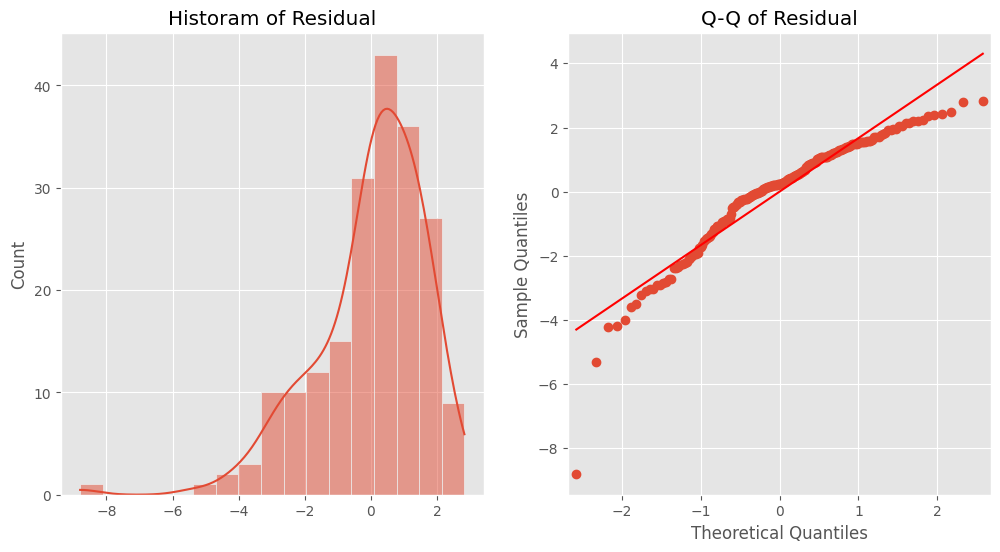

In [21]:
# Normality test
fig, ax = plt.subplots(1,2, figsize=(12,6))

#membuat histogram
sns.histplot(residual,kde=True,ax = ax[0])
ax[0].set_title('Historam of Residual')

sm.qqplot(residual, line='s',ax=ax[1])
ax[1].set_title('Q-Q of Residual')

plt.show()

**Jarque-Bera test**, The Jarque-Bera (JB) test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.

Samples from a normal distribution have an:
- expected skewness of 0 and
- an expected excess kurtosis of 0 (which is the same as kurtosis of 3)

Hypothesis:
- H0: Normal
- H1: Not normal

Any deviation from this assumptions increases the JB statistic. Next, we calculate the statistics but you can also find the results of the Jarque-Bera test in the regression summary.


In [22]:
name = ['jarque-bera','chi^2-twotail-prob','skew','kurtosis']
test = sm.stats.jarque_bera(residual)
lzip(name, test)

[('jarque-bera', np.float64(148.67851197833565)),
 ('chi^2-twotail-prob', np.float64(5.186463610325941e-33)),
 ('skew', np.float64(-1.323443180144976)),
 ('kurtosis', np.float64(6.291719008832815))]

**Summary**

- Residuals are not normally distributed
- So the assumption of normality is not met

`2. Gauss Markov Assumption`

- The error term has a population mean of zero
- Observation of the error terms are uncorrelated with each other
- The error term has constant variance/Non Constant standard deviation (Homoscedasticity)

In [23]:
# residual mean
residual.mean()

np.float64(6.1373128801278655e-15)

**Residual plot**, are a useful graphical tool for identifying non-linearity as well as heteroscedasticity. The residuals of this plot are those of the regression fit with all predictors.

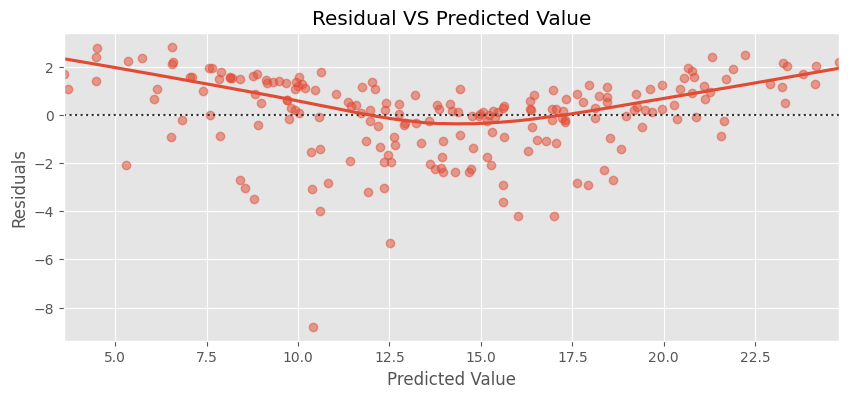

In [24]:
# Creating residual plot
plt.figure(figsize=(10,4))

plot = sns.residplot(
    x=y_pred,
    y='Sales',
    data=data,
    lowess=True,
    scatter_kws={'alpha':0.5}
)

plot.set_title('Residual VS Predicted Value')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residuals')
plt.show()


![](https://condor.depaul.edu/sjost/it223/documents/resid-plots.gif)

**Durbin-Watson test**, a test of autocorrelation that is designed to take account of the regression model is the Durbin-Watson test (also included in the regression summary). It is used to test the hypothesis that there is no lag one autocorrelation in the residuals.

Autocorrelation occurs when the residuals are not independent from each other. Linear regression analysis requires that there is little or no autocorrelation in the data. For instance, this typically occurs in stock prices, where the price is not dependent from the previous price.

- If there is no autocorrelation, the Durbin-Watson distribution is symmetric around 2.

- As a rough rule of thumb (Field, 2013):

    - If Durbin–Watson is less than 1.0, there may be cause for concern.
    - Small values of d indicate successive error terms are positively correlated.
    - If d > 2, successive error terms are negatively correlated.

In [25]:
# if the Durbin watson score approaches 2 then unbiased/uncorrelated
print('Durbin watson test:', sm.stats.durbin_watson(residual))

Durbin watson test: 2.0807806010045318


**Breusch-Pagan Lagrange Multiplier test**, Breusch-Pagan Lagrange Multiplier test can be used to identify heteroscedasticity.

Hypothesis:
- H0: homoscedasticity, which means that the residual variance does not depend on the values of the variable in x.
- H1: heteroscedasticity

Note that this test may exaggerate the significance of results in small or moderately large samples. In this case the F-statistic is preferable.

In [26]:
result.model.exog   # feature target

array([[  1. , 230.1,  37.8],
       [  1. ,  44.5,  39.3],
       [  1. ,  17.2,  45.9],
       [  1. , 151.5,  41.3],
       [  1. , 180.8,  10.8],
       [  1. ,   8.7,  48.9],
       [  1. ,  57.5,  32.8],
       [  1. , 120.2,  19.6],
       [  1. ,   8.6,   2.1],
       [  1. , 199.8,   2.6],
       [  1. ,  66.1,   5.8],
       [  1. , 214.7,  24. ],
       [  1. ,  23.8,  35.1],
       [  1. ,  97.5,   7.6],
       [  1. , 204.1,  32.9],
       [  1. , 195.4,  47.7],
       [  1. ,  67.8,  36.6],
       [  1. , 281.4,  39.6],
       [  1. ,  69.2,  20.5],
       [  1. , 147.3,  23.9],
       [  1. , 218.4,  27.7],
       [  1. , 237.4,   5.1],
       [  1. ,  13.2,  15.9],
       [  1. , 228.3,  16.9],
       [  1. ,  62.3,  12.6],
       [  1. , 262.9,   3.5],
       [  1. , 142.9,  29.3],
       [  1. , 240.1,  16.7],
       [  1. , 248.8,  27.1],
       [  1. ,  70.6,  16. ],
       [  1. , 292.9,  28.3],
       [  1. , 112.9,  17.4],
       [  1. ,  97.2,   1.5],
       [  

In [27]:
# if pvalue < 0.05 then reject H0
name = ['Lagrange multiplier statistic', 'p-value','f-value','f_p-value']
test = sm.stats.het_breuschpagan(residual,result.model.exog)

lzip(name,test)

[('Lagrange multiplier statistic', np.float64(4.809299865939565)),
 ('p-value', np.float64(0.09029710011528846)),
 ('f-value', np.float64(2.4269395850811004)),
 ('f_p-value', np.float64(0.09094292734128832))]

**Summary**

a. The error term has a population mean of zero = 5.86e-15 (near 0)
- Fulfilled, because the number of positive and negative errors is the same

b. Uncorrelated error
- Fulfilled, because the errors do not form a particular pattern

c. Homoscedasticity
- Fulfilled (homoscedasticity), constant variance.

#### **Multicollinearity**

Collinearity refers to the situation in which two or more predictor variables collinearity are closely related to one another. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. It is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation multicollinearity.

Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.

$VIF(X_j) = \frac{1}{1 - R_j^2}$

**Notes:**

- The smallest possible value for VIF is 1, which indicates the complete absence of collinearity.
- Typically in practice there is a small amount of collinearity among the predictors.
- A VIF greater than 10 indicates that collinearity is very high. A VIF value of more than 4 is not acceptable.
- As a rule of thumb, a VIF value that exceeds 5 indicates a problematic amount of collinearity and the parameter estimates will have large standard errors because of this.



In [28]:
X = data[['TV','Radio']]
X

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [29]:
VIF = [variance_inflation_factor(X,i) for i in range(len(X.columns))]

In [30]:
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vif

,feature,VIF
0,TV,2.238085
1,Radio,2.238085


We don't have a problematic amount of collinearity in our data.